In [340]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [360]:
coaches = pd.read_csv('combined.csv')

In [342]:
ly=coaches.groupby(['name','level']).agg({'year':'count'})
ly_piv=ly.reset_index().pivot(index = 'name',columns = 'level',values='year')[['Coordinator','Head','Positional']]

In [345]:
level_record = coaches[['name','level']].drop_duplicates()

In [361]:
coaches.dtypes

name         object
team         object
year          int64
position     object
phase        object
level        object
win         float64
loss        float64
tie         float64
dtype: object

In [363]:
level_record = coaches[['name','level']].drop_duplicates()
level_record_only = (coaches.groupby(['name','level']).agg(sum).win/
                      (coaches.groupby(['name','level']).agg(sum).win + 
                       coaches.groupby(['name','level']).agg(sum).loss)).to_frame(name='wl')
lp = pd.merge(level_record,level_record_only,how='left',on = ['name','level'])
lp_pivot = lp.pivot(index='name',columns='level',values='wl')[['Coordinator','Head','Positional']]

In [364]:
lyp = pd.merge(ly,lp,how='inner',on = ['name','level'])
lyp_piv = lyp.pivot(index = 'name', columns = 'level')

In [365]:
byyr = (coaches.groupby(['year','phase']).agg({'name':'count'}).name/coaches.groupby('year').agg({'team':'nunique'}).team).to_frame(name='avg coaches').reset_index()
byyr_piv = byyr.pivot(index='year',columns = 'phase')['avg coaches'][['Defense','Offense','Special Teams']]

In [366]:
head_g = coaches[coaches.level == 'Head'].groupby(['name','team','level'])
head_wl = head_g.agg({'year':'count','win':'sum','loss':'sum'})
head3_ct = head_wl.loc[head_wl.year>2]
head3_ct['wl']=head_wl.win/(head_wl.win+head_wl.loss)
head3_ct = head3_ct.reset_index().rename(columns = {'year':'season'})[['name','team','wl','season']]
head3_yr = coaches[coaches.level =='Head'].groupby(['name','team','level']).agg({'year':'min'}).reset_index().rename(columns={'year':'debut'})
head3 = pd.merge(head3_ct,head3_yr,how = 'inner',on = ['name','team'])


C:\Users\pol\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [367]:
past3_m = pd.merge(head3,coaches,how='inner',on='name',suffixes=('_h','_p'))
past3_m = past3_m.loc[(past3_m.year<past3_m.debut) & (past3_m.year>past3_m.debut-4)].sort_values('year')
past3 = past3_m.groupby(['name','team_h','debut']).agg({'win':'sum','loss':'sum','position':'first',
                                                        'phase':'first','level_p':'first','team_p':'first'})
past3['wl_p']=past3.win/(past3.win+past3.loss)
past3 = past3.reset_index().rename(columns={'team_h':'team'}).drop(columns=['win','loss'])
hp3 = pd.merge(head3,past3,how='right',on=['name','team','debut'])

In [368]:
relationship = dict()
names = sorted(coaches.name.dropna().unique())
for name in names:
    related = related_to(name)
    relationship[name] = related


def related_to(name):
    beenhere = coaches.loc[coaches.name == name][['team','year']]
    beenhere.reset_index(inplace =True)
    firsthand = set()
    for teamyear in range(len(beenhere)):
        (i,j) = beenhere.loc[teamyear,['team','year']]
        [firsthand.add(person) for person in coaches.loc[(coaches.team == i)&(coaches.year==j)].name.tolist()]
    firsthand.remove(name)
    return firsthand 

def worked_at(name_list):
    timespace = set()
    for name in name_list:
        beenhere = coaches.loc[coaches.name == name][['team','year']]
        beenhere.reset_index(inplace = True)
        for teamyear in range(len(beenhere)):
            (i,j) = beenhere.loc[teamyear,['team','year']]
            timespace.add((i,j))
    return timespace

In [328]:
def are_related(kevin, bacon, degree = None):
    newset=set()
    subt=set()

    if degree!=None:
        deglen=len(degree)

        degree=degree + [set()]
        timeyr = worked_at(degree[deglen-1])
        for (i,j) in timeyr:
            [newset.add(person) for person in coaches.loc[(coaches.team == i)&(coaches.year==j)].name.tolist()]

            if bacon in newset:
                print(deglen)
                print(i,' ',j)
#                 print(type(degree))
                return deglen
            else:
                degree[deglen] = degree[deglen]|newset
#                 print(len(newset), ' ',i,' ',j)
                newset=set()
            

        for i in range(0,deglen):
            subt = subt|degree[i]

        newset= newset-subt
        if newset== None:
            return 'No Connection'

        are_related(kevin, bacon, degree)
    else:
        deglen = 0
        if kevin == bacon:
            return deglen
        else:
            degree = [{kevin}]
            deglen = are_related(kevin, bacon, degree)
            return deglen

#has to reiterate out to return


In [369]:
are_related('Adam Gase','Andy Reid')

2
Green Bay Packers   1994


In [335]:
(person1,person2) = coaches['name'].sample(2)

In [338]:
(person1,person2) = coaches['name'].sample(2)
print(person1)
print(person2)
are_related(person1,person2)

Tim Spencer
Tony Wise
3
Miami Dolphins   2003


In [321]:
asdf = [{'Adam Gase'}, {'Dick Jauron', 'Mike Singletary', 'John Fox', 'Steve Mariucci', 'Joe Vitt', 'Jay Rodgers', 'Pat Carter', 'Ted Tollner', 'Jason Tarver', 'Richard Smith', 'Kippy Brown', 'Chris Foerster', 'Rod Marinelli', 'Bob Ligashesky', 'George Warhop', 'Wilbert Montgomery', 'Jim Tomsula', 'Kris Kocurek', 'Tom Rathman', 'Clancy Barone', 'Jim Washburn', 'Adam Gase', 'Dave Fipp', 'Joe Cullen', 'Cory Undlin', 'Ben Johnson', 'Dave Magazu', 'Tony Nathan', 'Danny Barrett', 'Brian Callahan', 'Rick Dennison', 'Andy Sugarman', 'Clayton Lopez', 'Tyke Tolbert', 'George Catavolos', 'Wayne Nunnely', 'Renaldo Hill', 'Sam Gash', 'Tony Oden', 'Phil Snow', 'Josh Grizzard', 'Kevin Lartigue', 'Fred Reed', 'Fred Graves', 'Dave DeGuglielmo', 'Daronte Jones', 'Shawn Jefferson', 'Bo Hardegree', 'Mike Nolan', 'Keith Burns', 'Don Clemons', 'Charlie Bullen', 'Chris Kuper', 'Roman Phifer', 'Ron Milus', 'Pete Hoener', 'Bob Wylie', 'Jerry Sullivan', 'Tim Martz', 'Greg Olson', 'Ed Donatell', 'Ben McDaniels', 'Jim Colletto', 'Eric Studesville', 'Frank Bush', 'Johnny Holland', 'Don Martindale', 'Terrell Williams', 'Andre Carter', 'Johnny Lynn', 'Johnnie Lynn', 'Marwan Maalouf', 'Josh McDaniels', 'Mark Thewes', 'Matt Burke', 'Sam Garnes', 'Jeremiah Washburn', 'Rusty McKinney', 'Jeff Ferguson', 'Bobby Turner', 'Sean Kugler', 'Mike Barry', 'Larry Brooks', 'Pat Morris', 'Lou Anarumo', 'Shane Day', 'Stan Kwan', 'Vance Joseph', 'Craig Aukerman'}]

In [325]:
'Dick Jauron' in asdf[1]

True

In [307]:
coaches.loc[(coaches.team == 'Green Bay Packers') & (coaches.year == 1994)]

,name,team,year,position,phase,level,win,loss,tie
4856,Mike Holmgren,Green Bay Packers,1994,Head Coach,Head,Head,9.0,7.0,0.0
4857,Jon Gruden,Green Bay Packers,1994,Wide Receivers,Offense,Positional,9.0,7.0,0.0
4858,Dick Jauron,Green Bay Packers,1994,Defensive Backs/Secondary,Defense,Positional,9.0,7.0,0.0
4859,Jim Lind,Green Bay Packers,1994,Quality Control/Defensive Assistant,Defense,Positional,9.0,7.0,0.0
4860,Steve Mariucci,Green Bay Packers,1994,Quarterbacks,Offense,Positional,9.0,7.0,0.0
4861,Andy Reid,Green Bay Packers,1994,Assistant Offensive Line/Tight Ends,Offense,Positional,9.0,7.0,0.0
8579,Gil Haskell,Green Bay Packers,1994,Running Backs,Offense,Positional,9.0,7.0,0.0
8580,Tom Lovat,Green Bay Packers,1994,Offensive Line,Offense,Positional,9.0,7.0,0.0
8581,Larry Brooks,Green Bay Packers,1994,Defensive Line,Defense,Positional,9.0,7.0,0.0
8582,Bob Valesente,Green Bay Packers,1994,Linebackers,Defense,Positional,9.0,7.0,0.0


In [133]:
asdf!=None

False

In [110]:
len(asdf)

TypeError: object of type 'NoneType' has no len()

In [114]:
def related_to(name):
    relationship = dict()
    beenhere = coaches.loc[coaches.name == name][['team','year']]
    beenhere.reset_index(inplace =True)
    firsthand = set()
    for teamyear in range(len(beenhere)):
        (i,j) = beenhere.loc[teamyear,['team','year']]
        [firsthand.add(person) for person in coaches.loc[(coaches.team == i)&(coaches.year==j)].name.tolist()]
    firsthand.remove(name)
    return firsthand 

In [117]:
type(related_to('Andy Reid'))

set

In [106]:
sdf={'a':1,'b':3,'c':2}

In [107]:
len(sdf)

3

# Coaches by Year

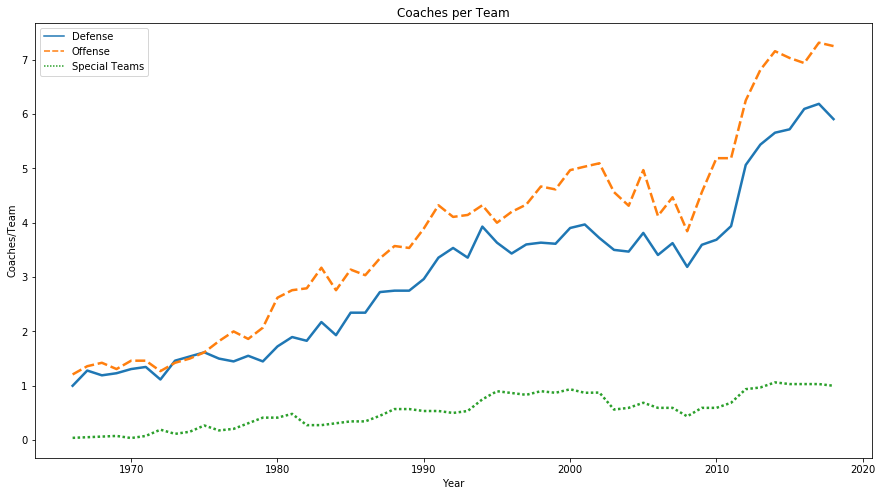

In [383]:
plt.figure(figsize=(15,8))
no_coach = sns.lineplot(data=byyr_piv, palette="tab10", linewidth=2.5)
no_coach.set(xlabel='Year', ylabel='Coaches/Team')
no_coach.set_title('Coaches per Team')
plt.show()

In [579]:
lyp.groupby('level').agg({'year':['mean','median'],'wl':['mean','median']})

year               wl          
                 mean median      mean    median
level                                           
Coordinator  3.793750      2  0.486413  0.484375
Head         5.055328      3  0.454695  0.468354
Positional   5.923874      4  0.481948  0.488543

# Years in Levels of Coaching

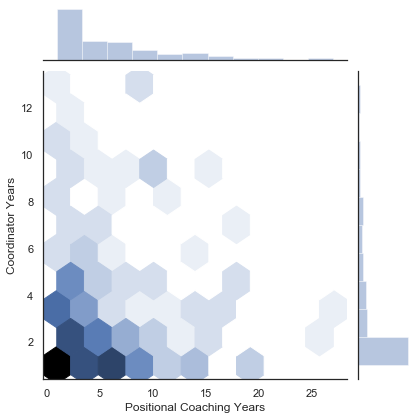

In [402]:

sns.set(style="white")
cvp_yr = sns.jointplot(x='Positional', y='Coordinator', data= ly_piv, kind = 'hexa')
cvp_yr.set_axis_labels(xlabel='Positional Coaching Years', ylabel='Coordinator Years')
plt.show()

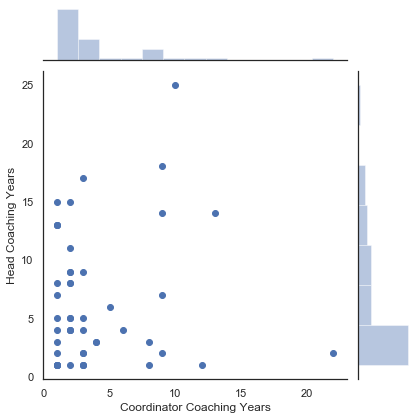

In [581]:
hvc_yr = sns.jointplot(x='Coordinator', y='Head', data= ly_piv)
hvc_yr.set_axis_labels(xlabel='Coordinator Coaching Years', ylabel='Head Coaching Years')
plt.show()

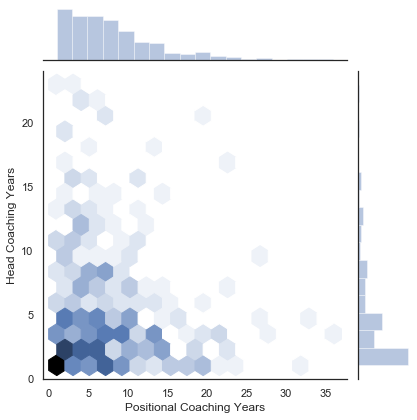

In [582]:
hvp_yr = sns.jointplot(x='Positional', y='Head', data= ly_piv, kind = 'hexa')
sns.set(style="white")
hvp_yr.set_axis_labels(xlabel = 'Positional Coaching Years', ylabel='Head Coaching Years')
plt.show()

# Years at each Level

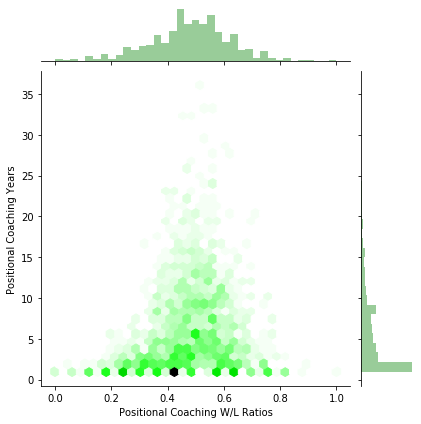

In [375]:
wvy_pp = sns.jointplot(x=lyp_piv.wl.Positional, y=lyp_piv.year.Positional, kind = 'hexa', color = 'green')
wvy_pp.set_axis_labels(xlabel = 'Positional Coaching W/L Ratios', ylabel='Positional Coaching Years')
plt.show()

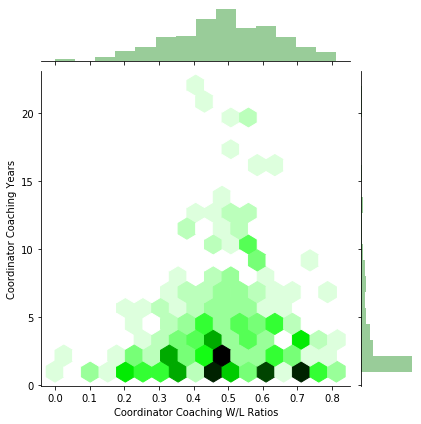

In [377]:
wvy_cc = sns.jointplot(x=lyp_piv.wl.Coordinator, y=lyp_piv.year.Coordinator, kind = 'hexa', color = 'green')
wvy_cc.set_axis_labels(xlabel = 'Coordinator Coaching W/L Ratios', ylabel='Coordinator Coaching Years')
plt.show()

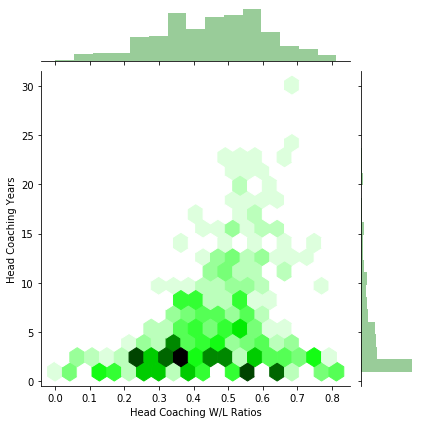

In [378]:
wvy_hh = sns.jointplot(x=lyp_piv.wl.Head, y=lyp_piv.year.Head, kind = 'hexa', color = 'green')
wvy_hh.set_axis_labels(xlabel = 'Head Coaching W/L Ratios', ylabel='Head Coaching Years')
plt.show()

# Win Ratios

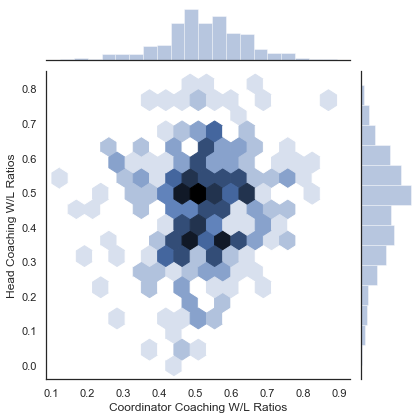

In [403]:
pvc_wl = sns.jointplot(x='Positional', y='Head', data= lp_pivot,kind = 'hexa')
sns.set(style="white")
pvc_wl.set_axis_labels(xlabel = 'Coordinator Coaching W/L Ratios', ylabel='Head Coaching W/L Ratios')
plt.show()

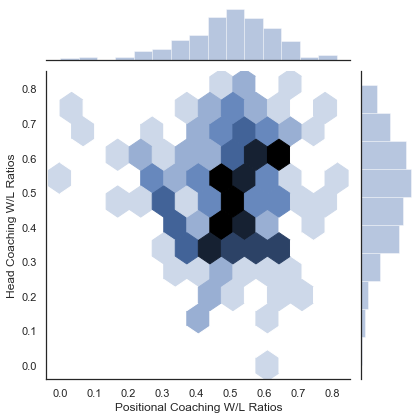

In [586]:
cvp_wl = sns.jointplot(x='Positional', y='Coordinator', data= lp_pivot,kind = 'hexa')
cvp_wl.set_axis_labels(xlabel = 'Positional Coaching W/L Ratios', ylabel='Head Coaching W/L Ratios')
plt.show()

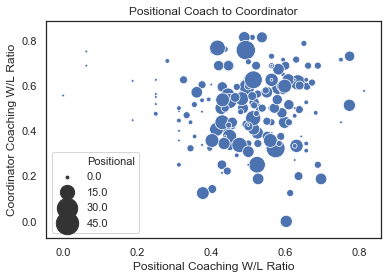

In [587]:
cvp_yrwl = sns.scatterplot(x = lyp_piv.wl.Positional, y=lyp_piv.wl.Coordinator, size=lyp_piv.year.Positional, sizes = (8,500))
cvp_yrwl.set(xlabel='Positional Coaching W/L Ratio', ylabel='Coordinator Coaching W/L Ratio')
cvp_yrwl.set_title('Positional Coach to Coordinator')
plt.show()

In [379]:
print('Coaches lasting for 3 or more years: ', len(head3))

Coaches lasting for 3 or more years:  341


In [380]:
print('Also worked in NFL for 3 or more years prior: ',len(hp3))

Also worked in NFL for 3 or more years prior:  191


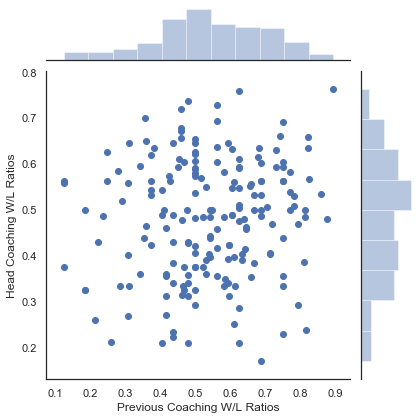

In [663]:
hp3_wl = sns.jointplot(x='wl_p', y='wl', data= hp3)
hp3_wl.set_axis_labels(xlabel = 'Previous Coaching W/L Ratios', ylabel='Head Coaching W/L Ratios')
plt.show()

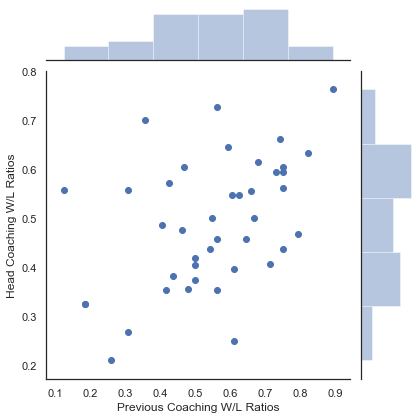

In [664]:
hp3_wl = sns.jointplot(x='wl_p', y='wl', data= hp3.loc[hp3.team==hp3.team_p])
hp3_wl.set_axis_labels(xlabel = 'Previous Coaching W/L Ratios', ylabel='Head Coaching W/L Ratios')
plt.show()

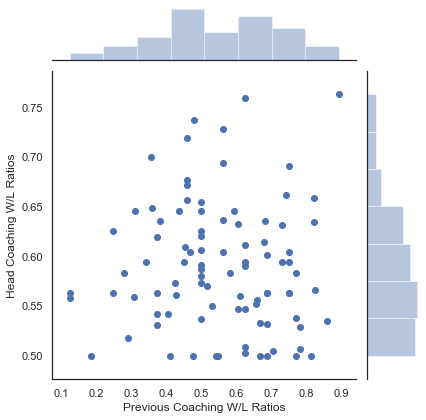

In [667]:
hp3_wl = sns.jointplot(x='wl_p', y='wl', data= hp3.loc[hp3.wl>=0.5])
hp3_wl.set_axis_labels(xlabel = 'Previous Coaching W/L Ratios', ylabel='Head Coaching W/L Ratios')
plt.show()

# Erdo Number

In [ ]:
(person1,person2) = coaches['name'].sample(2)
print(person1)
print(person2)
are_related(person1,person2)